
# The filling algorithm should do a few things.

1. There are two possible sizes of microtiter plates 96-well (12x8) and 384-well (24x16) - return an error if there is overflow.
2. Keep experiments grouped as much as possible - within experiments group samples and reagents

# #1 Naive approach - greedily fill the plates and only group reagents and specimen that repeat within experiments.
The plates will be represented as 12x8 or 24x16 matrix depending on the input and the cells will be filled iteratively experiment by experiment.
The plate will be filled row by row from left to right and will be added to a result list once it is filled or all experiments are placed in the wells.

In [52]:
from typing import List


plate_size = 96
samples = [['Sam 1', 'Sam 2', 'Sam 3'], ['Sam 1', 'Sam 3', 'Sam 4']]
reagents = [['Reag X', 'Reag Y'], ['Reag Y', 'Reag Z']]
replicas = [1, 3]
well_num = 1

class PlateFillError(Exception):
    def __init__(self, message):
        self.message = message
        super().__init__(self.message)

def greedy_fill(plate_size: int, samples: List[List[str]], reagents: List[List[str]], replicas: List[int], well_num: int) -> List[List[str]]:
    wells_available = plate_size * well_num
    wells_needed = 0
    experiment_count = len(replicas)
    for experiment_number in range(experiment_count):
        wells_needed += len(samples[experiment_number]) * len(reagents[experiment_number]) * replicas[experiment_number]
    
    if wells_needed > wells_available:
        error_message = f"Number of wells needed {wells_needed} exceed available number of wells {wells_available}."
        raise PlateFillError(error_message)

    print(f"Log message: Enough wells are available to distribute experiments.")
    
    if plate_size == 96:
        num_rows = 8
        num_cols = 12
    elif plate_size == 384:
        num_rows = 16
        num_cols = 24

    plate = [[[None] for _ in range(num_cols)] for _ in range(num_rows)]
    result = []

    current_well = 0

    for experiment_number in range(experiment_count):
        experiment_samples = samples[experiment_number]
        experiment_reagents = reagents[experiment_number]
        experiment_replicas = replicas[experiment_number]

        for replica in range(experiment_replicas):
            for reagent in experiment_reagents:
                for sample in experiment_samples:
                    if current_well > plate_size:
                        result.append(plate)
                        plate = [[[None] for _ in range(num_cols)] for _ in range(num_rows)]
                        current_well = 0

                    row_index = current_well // num_cols
                    col_index = current_well % num_cols

                    plate[row_index][col_index] = [experiment_number, sample, reagent]

                    current_well += 1

    if plate:
        result.append(plate)

    return result

try:
    plates = greedy_fill(plate_size=96, samples=samples, reagents=reagents, replicas=replicas, well_num=well_num)
except PlateFillError as e:
    print(f"PlateFillError: {e.message}")


    


Log message: Enough wells are available to distribute experiments.


# Visualize the resulting plates

Plate #1


C:\Users\rmarko\AppData\Local\Temp\ipykernel_16604\2718500604.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, color=color_map[reagent], edgecolor='black', linewidth=2))


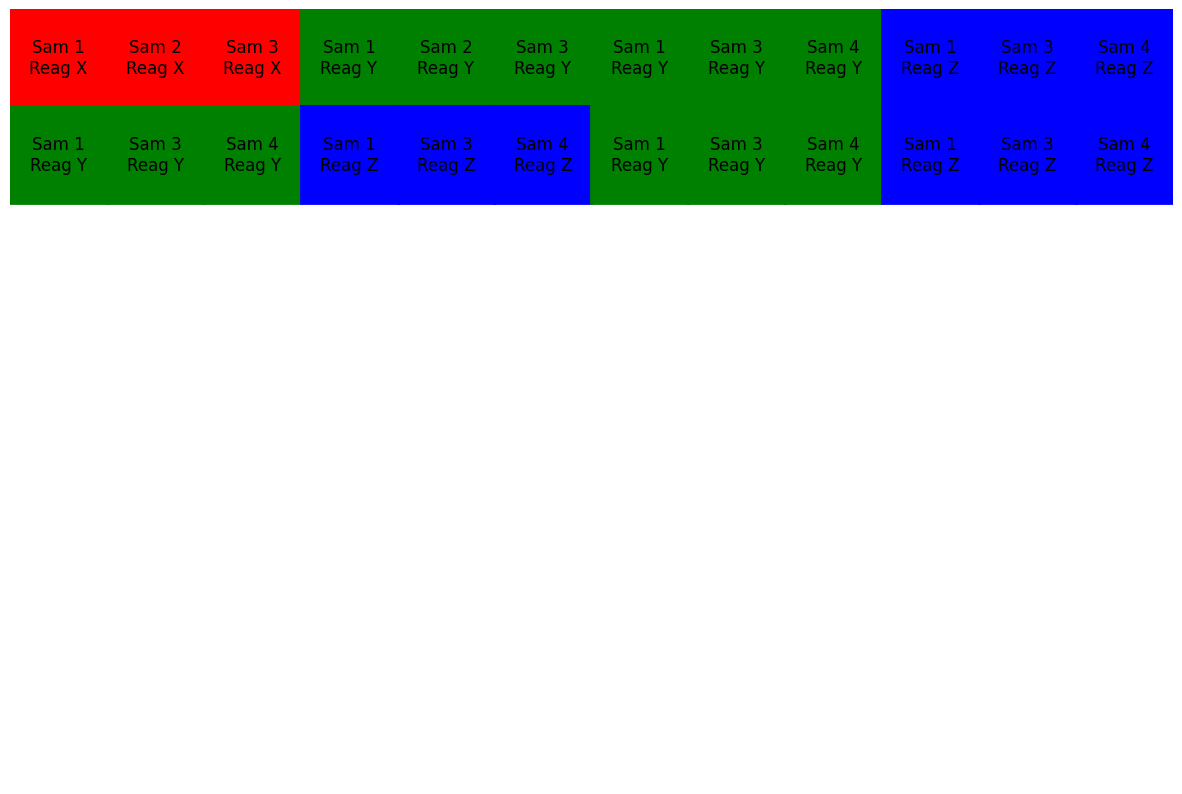

In [53]:
import matplotlib.pyplot as plt
import itertools

def plot_plate(plate, color_map):
    _, ax = plt.subplots(figsize=(15, 15))
    for i, row in enumerate(plate):
        for j, well in enumerate(row):
            if well and all(w is not None for w in well):
                reagent = well[1]
                if reagent not in color_map:
                    color_map[reagent] = next(color_cycle)
                ax.text(j, i, f"{well[0]}\n{well[1]}", ha='center', va='center', fontsize=12, color='black')
                ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, color=color_map[reagent], edgecolor='black', linewidth=2))

    ax.set_xlim(-0.5, len(plate[0])-0.5)
    ax.set_ylim(-0.5, len(plate)-0.5)
    ax.set_aspect('equal', 'box')
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.show()

colors = ['red', 'green', 'blue', 'purple', 'orange', 'pink', 'brown', 'cyan', 'magenta']
color_cycle = itertools.cycle(colors)

color_map = {}

for i, plate in enumerate(plates, 1):
    print(f"Plate #{i}")
    plot_plate(plate, color_map)
    # plt.savefig(f'Plate_{i}.png')

